In [1]:
import csv
# random seed for reproducibility
import random
random.seed(123)

for i in range(4):
    print(random.random())

0.052363598850944326
0.08718667752263232
0.4072417636703983
0.10770023493843905


In [2]:
# number of data
N=10000
# size of each data point
L=8
# 4 intervals of length Z=L/4, each containing a set of 1's or 0's
Z=int(L/4)
# choose among states (1,0,1,0), (0,1,1,0), (1,0,0,1), (0,1,0,1) from a 2x2 product of (1,0)x(1,0)
# with prob=1/4
# corruption of bits: switch each of the L variables with probability q
q=0.1

y = [0] * N
x = [[0] * L for j in range(N)]
vec1 = [1] * Z     

def ones(n,i,j):
    x[n][Z*i:Z*(i+1)] = vec1
    x[n][Z*(j+2):Z*(j+3)] = vec1

random.seed(123)
for n in range(N):
    a = random.randint(0,1)
    b = random.randint(0,1)
    y[n] = a+b*2
    ones(n,a,b)
    
    for j in range(L):
        if random.random()<q:
             x[n][j] = 1-x[n][j]
                
                
for n in range(min(20,N)):
    print(x[n],y[n])

[0, 1, 0, 0, 1, 0, 1, 1] 2
[1, 1, 0, 1, 1, 0, 0, 1] 0
[0, 1, 1, 1, 0, 0, 1, 1] 3
[0, 0, 1, 1, 1, 1, 0, 0] 1
[0, 0, 1, 1, 0, 0, 1, 0] 3
[1, 1, 0, 0, 1, 0, 0, 0] 0
[0, 1, 1, 0, 1, 1, 0, 0] 1
[1, 1, 0, 0, 0, 0, 1, 1] 2
[1, 0, 0, 1, 1, 1, 0, 1] 1
[1, 0, 0, 0, 0, 0, 1, 0] 2
[0, 1, 1, 1, 1, 0, 1, 1] 3
[1, 1, 1, 0, 0, 1, 0, 0] 0
[0, 0, 1, 1, 0, 0, 1, 1] 3
[0, 0, 1, 1, 1, 1, 0, 1] 1
[0, 0, 1, 1, 1, 0, 0, 0] 1
[0, 0, 0, 1, 0, 0, 1, 1] 3
[1, 0, 0, 0, 1, 1, 0, 0] 0
[0, 0, 1, 1, 0, 0, 1, 1] 3
[1, 1, 0, 0, 1, 1, 1, 0] 0
[0, 0, 1, 1, 0, 0, 1, 1] 3


In [3]:
!mkdir DATA

fname = 'DATA/dataRBM_q'+str(q)+'.csv'
print(fname)
# any way to do it in one line?
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    for i in range(N):
        writer.writerow(x[i])

DATA/dataRBM_q0.1.csv


A subdirectory or file DATA already exists.


In [ ]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
q = 0.1
fname= "DATA/dataRBM_q" + str(q)+".csv"
v = np.loadtxt(fname, delimiter=",", dtype=int)
N = len(v)
L = len(v[0])
print(f"each of N={N} data smaples has L={L} digits")
for n in range(10):
    print(v[n])
print("...")

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v = 2*v - 1
else:
    vmin = 0
    GAP = 1

#store initial values
v0 = v
for n in range(10):
    print(v[n])
print("...")

each of N=10000 data smaples has L=8 digits
[0 1 0 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[0 1 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 0 0 1 0 0 0]
[0 1 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...
[-1  1 -1 -1  1 -1  1  1]
[ 1  1 -1  1  1 -1 -1  1]
[-1  1  1  1 -1 -1  1  1]
[-1 -1  1  1  1  1 -1 -1]
[-1 -1  1  1 -1 -1  1 -1]
[ 1  1 -1 -1  1 -1 -1 -1]
[-1  1  1 -1  1  1 -1 -1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1  1  1 -1  1]
[ 1 -1 -1 -1 -1 -1  1 -1]
...


In [3]:
# nr hidden units
M = 3
sigma = np.sqrt(4. / float(L+M))
np.random.seed(12345)
w = sigma * (2*np.random.rand(L,M) - 1)
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print("w=",w)
print("a=",a)
print("b=",b)
w0,a0,b0 = w,a,b 

w= [[ 0.5181365  -0.22145941 -0.38120826]
 [-0.35631371  0.08167946  0.11523125]
 [ 0.56022559  0.18473853  0.3001927 ]
 [ 0.18521223  0.2987553   0.55635686]
 [-0.59290602 -0.47464594 -0.24277246]
 [ 0.18863898  0.373648    0.44886104]
 [ 0.56038609  0.26977468  0.17183171]
 [ 0.26225893 -0.03907707 -0.21035279]]
a= [-0.07279134  0.27701546  0.59580401  0.21331772  0.35074515 -0.39689234
 -0.57064124  0.36226014]
b= [0. 0. 0.]


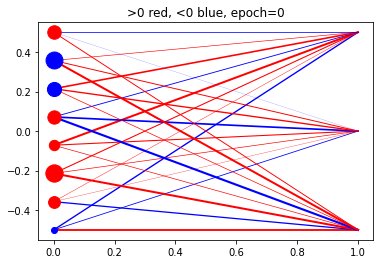

In [4]:
def create_coord(np,x0):
    x = [x0] * np
    y = list(range(np))
    for i in range(np):
        y[i] = y[i]/(np-1.) - 0.5
    return (x,y)
(x1,y1) = create_coord(L,0)
(x2,y2) = create_coord(M,1)

def mycolor(val):
    if val>0:
        return "red"
    elif val<0:
        return "blue"
    return "black"

def plotgraph(epoch=0):
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i], x2[j]),(y1[i], y2[j]), mycolor(w[i][j])
            plt.plot(ex,ey,col,zorder=1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    for i in range(L):
        plt.scatter(x1[i],y1[i],s=A*np.abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        plt.scatter(x2[j],y2[j],s=A*np.abs(b[j]), zorder=2, c=mycolor(b[j]))    
    plt.title(f">0 red, <0 blue, epoch={epoch}")        
    plt.show()
    
plotgraph()    
    

In [5]:
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    prob = 1. / (1. + exp(-DE*act))
    n = len(act)
    v_out = np.full(n, vmin)
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input =", v_in)
        print("act =", act)
        print("prob = ", prob)
        print("out =", v_out)
    return (v_out)

activate(v[0],w,b,GAP,info=True)

input = [-1  1 -1 -1  1 -1  1  1]
act = [-1.57878802 -0.79795129 -1.09026463]
prob =  [0.0407938  0.16855507 0.10151264]
out = [-1  1 -1]


array([-1,  1, -1])

---- epoch = 1 n = 499  m = 500
dw= [[-0.304 -0.276 -0.34 ]
 [ 0.076 -0.256 -0.48 ]
 [-0.14   0.152  0.296]
 [-0.012  0.152  0.152]
 [-0.108  0.192  0.264]
 [-0.744 -0.476 -0.252]
 [ 0.176 -0.068 -0.3  ]
 [ 0.316  0.144  0.064]]
da= [ 0.012 -0.232 -0.328 -0.176 -0.136  0.284  0.348 -0.184]
db= [0.004 0.128 0.024]
---- epoch = 2 n = 499  m = 500
dw= [[-0.00761905 -0.05714286 -0.12952381]
 [-0.00761905  0.01904762  0.03809524]
 [ 0.08380952  0.01142857 -0.06857143]
 [ 0.00761905  0.07238095  0.07619048]
 [ 0.03047619 -0.00380952 -0.09904762]
 [-0.02666667  0.02285714 -0.05714286]
 [ 0.01904762 -0.00761905  0.01904762]
 [ 0.03809524 -0.08761905 -0.03047619]]
da= [-0.03428571 -0.05714286 -0.01904762  0.03428571  0.01904762  0.08380952
 -0.00761905 -0.00380952]
db= [-0.01142857 -0.05333333  0.01142857]


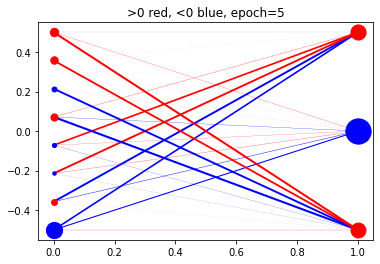

l_rate = 0.7999999999999998


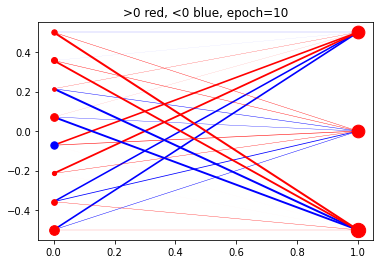

l_rate = 0.6666666666666663


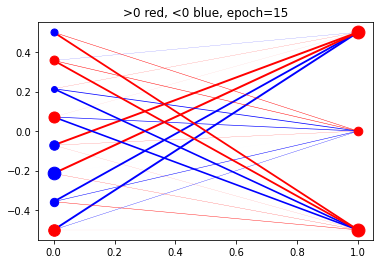

l_rate = 0.5714285714285713


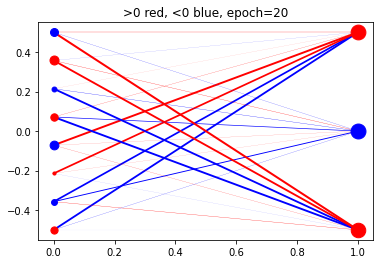

l_rate = 0.5


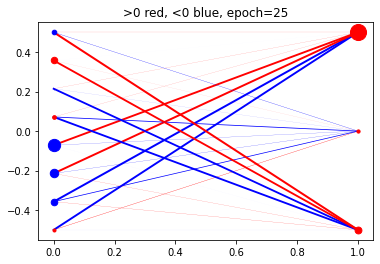

l_rate = 0.4444444444444445


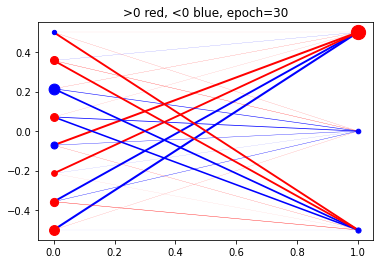

l_rate = 0.4000000000000001


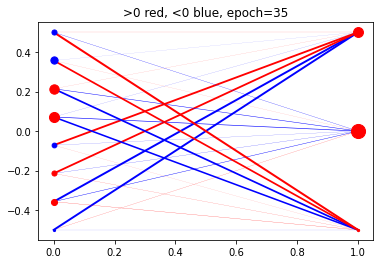

l_rate = 0.3636363636363637


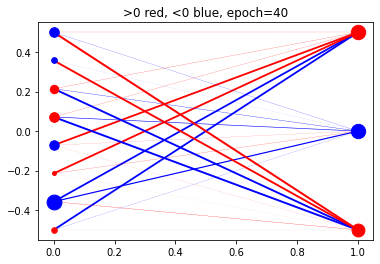

l_rate = 0.3333333333333335


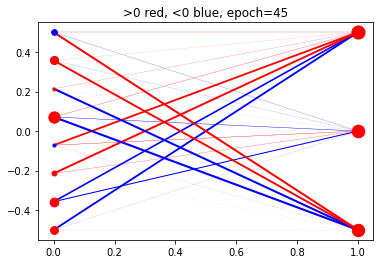

l_rate = 0.3076923076923079


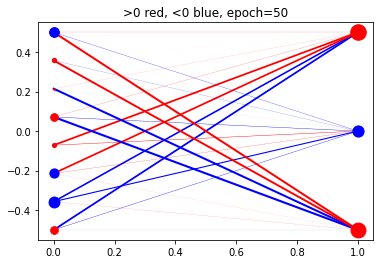

l_rate = 0.28571428571428586


In [7]:
np.random.seed(12345)

l_rate = 1.0

#minibatches
mini, m = 500, 0
#epochs
nepoch = 50

for epoch in range(1,1+nepoch):
    for n in range(N):
        if m == 0:
            #initailize
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L,M)), np.zeros((L,M))
            
        #positive CD phase
        h = activate(v[n],w,b,GAP)
        #negative CD phase
        vf = activate(h,w.T,a,GAP)
        #positive CD phase nr 2
        hf = activate(vf,w,b,GAP)
        
        v_data += v[n]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[n].T, h)
        vh_model += np.outer(vf.T, hf)
        
        m += 1
        
        if m == mini:
            C = l_rate / mini
            dw = C*(vh_data-vh_model)
            da = C*(v_data-v_model)
            db = C*(h_data-h_model)
            if epoch<=2 and n<=mini:
                print("---- epoch =", epoch, "n =", n, " m =", m)
                print("dw=", dw)
                print("da=", da)
                print("db=", db) 
            w += dw
            a += da
            b += db
            m = 0    
    #randomize order
    np.random.shuffle(v)
    l_rate = l_rate / (0.05*l_rate+1)
    if epoch%5 ==0:
        plotgraph(epoch)
        print("l_rate =", l_rate)
 


In [8]:
print("w0 =", w0)
print("w =", w)
print("a0 =", a0)
print("a =", a)
print("b0 =", b0)
print("b =", b)

w0 = [[-0.03230592 -0.18897742 -0.99528701]
 [ 0.05044492 -0.60900417 -0.90061793]
 [ 0.03059708  0.10493422  0.97435532]
 [-0.00704716  0.23282407  0.98770312]
 [-1.1649931  -0.19985982  0.0848993 ]
 [-1.12953352 -0.01540091  0.04196045]
 [ 1.08350408 -0.07856019  0.00695172]
 [ 1.11838112 -0.13557507  0.07872514]]
w = [[-0.03230592 -0.18897742 -0.99528701]
 [ 0.05044492 -0.60900417 -0.90061793]
 [ 0.03059708  0.10493422  0.97435532]
 [-0.00704716  0.23282407  0.98770312]
 [-1.1649931  -0.19985982  0.0848993 ]
 [-1.12953352 -0.01540091  0.04196045]
 [ 1.08350408 -0.07856019  0.00695172]
 [ 1.11838112 -0.13557507  0.07872514]]
a0 = [ 0.02175603 -0.04361016 -0.03126307  0.00593383  0.02172369  0.00096322
  0.00693616 -0.0352993 ]
a = [ 0.02175603 -0.04361016 -0.03126307  0.00593383  0.02172369  0.00096322
  0.00693616 -0.0352993 ]
b0 = [ 0.08172878 -0.0459849   0.0886649 ]
b = [ 0.08172878 -0.0459849   0.0886649 ]


In [9]:
v1 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w,b,GAP)
    v1[n] = activate(h,w.T,a,GAP)
for n in range(10):
    print((v0[n]).astype(int),(v1[n]).astype(int))

[-1 -1 -1  1  1  1 -1 -1] [-1  1  1  1  1  1  1 -1]
[ 1  1 -1 -1 -1 -1  1  1] [ 1  1 -1 -1 -1 -1  1  1]
[-1 -1  1 -1 -1 -1  1 -1] [-1 -1 -1  1 -1 -1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1] [ 1 -1 -1 -1 -1 -1  1 -1]
[ 1  1 -1  1  1  1 -1 -1] [ 1 -1  1 -1 -1  1 -1 -1]
[ 1  1 -1 -1 -1 -1 -1  1] [-1  1 -1 -1 -1 -1  1  1]
[ 1  1 -1 -1  1  1 -1 -1] [ 1  1 -1 -1  1  1 -1 -1]
[ 1  1 -1 -1 -1 -1  1 -1] [ 1  1 -1 -1 -1 -1  1  1]
[-1  1 -1 -1 -1 -1  1  1] [ 1 -1 -1 -1 -1 -1  1  1]
[ 1  1 -1 -1  1  1 -1 -1] [ 1  1 -1 -1  1  1 -1  1]
